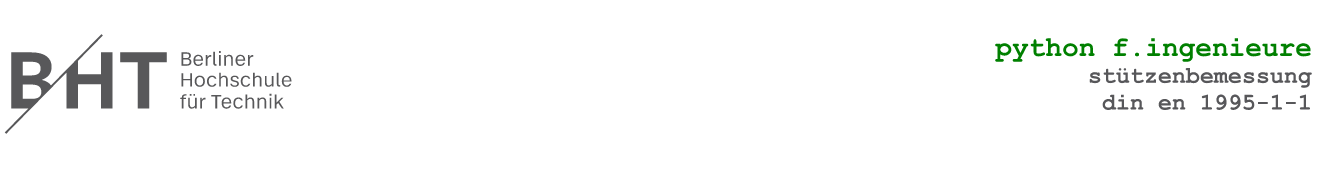

# Stützenbemessung nach der DIN EN 1995-1-1 Abs. 6.3

## Ersatzstabverfahren

Das Ersatzstabverfahren ist ein vereinfachtes Nachweisverfahren, welches die Schnittgrößen nach der Theorie I. Ordnung, also am unverformten System, ermittelt und dabei die geometrische Nichtlinearität für die Versagensfälle Knicken und Kippen anhand von Beiwerten berücksichtigt. Üblicherweise kommt dieses Verfahren bei der Betrachtung von Einzelstäben zum Einsatz.

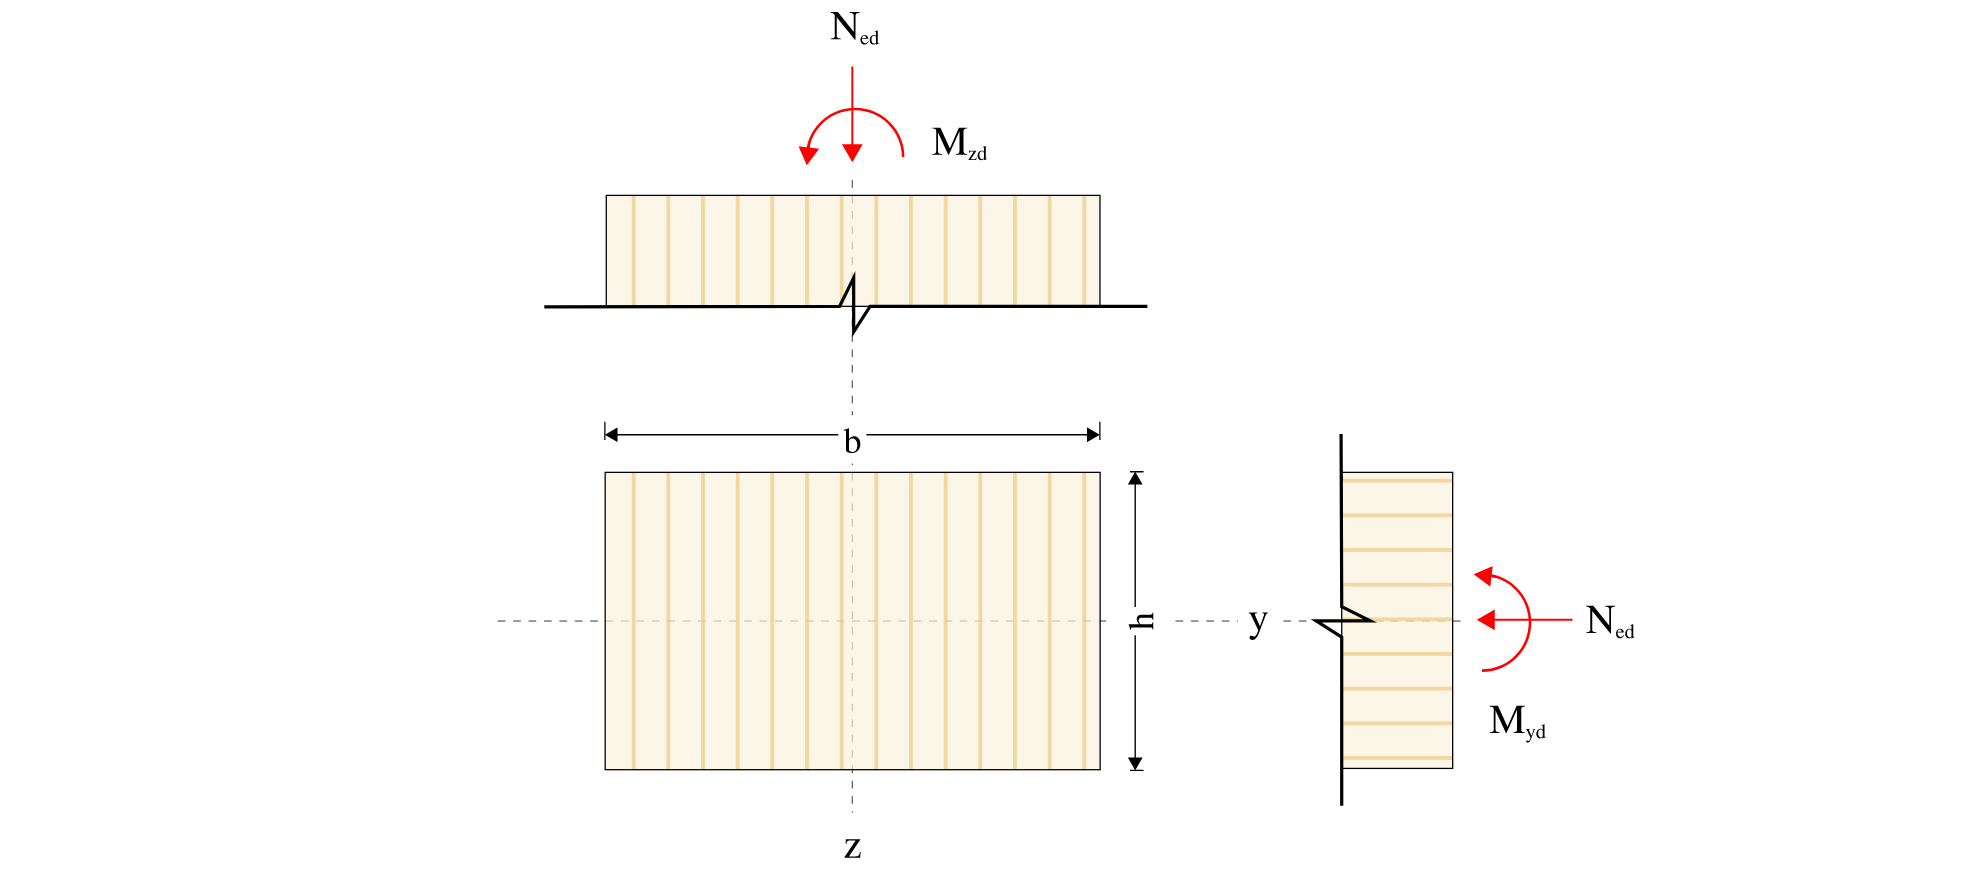

### Eingangswerte

In [21]:
# Bibliotheken
from math import sqrt, pi    # Mathematische Funktionen
import matplotlib.pyplot as plt    # Erstellen von Grafiken
import pandas as pd    # Erstellen von Tabellen
import handcalcs.render    # Darstellung formattierter Gleichungen

# Sytem und Geometrie
Lagerung = 'Pendelstütze'
L = 3    # m - Länge
b = 0.5    # m - Breite
h = 0.4    # m - Höhe

# Einwirkung
N_ed = 2000    # kN - Normalkraft
M_yd = 50    # kNm - Moment um y-Achse
M_zd = 30    # kNm - Moment um z-Achse

# Festigkeitskennwerte
Güte = 'GL28h'    # Holzgüte
f_c0k = 28*1000    # $kN/m^2$ - Druck  
f_myk = 28*1000    # $kN/m^2$ - Biegung
f_mzk = 28*1000    # $kN/m^2$ - Biegung
E_0mean = 12500*1000    # $kN/m^2$ - E-Modul  
E_05 = 9600*1000    # $kN/m^2$ - E-Modul  
G_05 = 540*1000    # $kN/m^2$ - Schubmodul  

# Widerstandbeiwerte
k_mod = 0.8    # Modifikationsbeiwert
gamma = 1.3    # Teilsicherheitsbeiwert

#### System

In [22]:
%%render
Lagerung 

<IPython.core.display.Latex object>

In [23]:
# if-Abfrage zur Bestimmung von beta
if Lagerung == 'Pendelstütze':
    beta = 1
elif Lagerung == 'Kragstütze':
    beta = 2
elif Lagerung == 'Eingespannt (u/o)':
    beta = 0.7
else:
    beta = 0.5

#### Geometrie

In [24]:
%%render params 1
L    # m - Länge
b    # m - Breite
h    # m - Höhe

<IPython.core.display.Latex object>

#### Bemessungswerte der Einwirkung

In [25]:
%%render params 1
N_ed    # kN - Normalkraft
M_yd    # kNm - Moment um y-Achse
M_zd    # kNm - Moment um z-Achse

<IPython.core.display.Latex object>

#### Charakteristische Festigkeitswerte

In [26]:
%%render params 1
Güte    # Holzgüte
f_c0k    # $kN/m^2$ - Druck  
f_myk    # $kN/m^2$ - Biegung
f_mzk    # $kN/m^2$ - Biegung
E_0mean    # $kN/m^2$ - E-Modul  

<IPython.core.display.Latex object>

#### Widerstandsbeiwerte

In [27]:
%%render
k_mod    # Modifikationsbeiwert
gamma    # Teilsicherheitsbeiwert
xi = k_mod/gamma    # Abminderungsbeiwert

<IPython.core.display.Latex object>

### Berechnung

#### Querschnittsparameter

In [28]:
%%render params 3
A = b*h    # $m^2$ - Querschnitt

<IPython.core.display.Latex object>

In [29]:
%%render params 5
I_y = (b*h**3)/12    # $m^4$ - FTM
w_y = (b*h**2)/6    # $m^3$ - Widerstandsmoment
i_y = h/sqrt(12)    # $m$ - polares Trägheitsmoment


I_z = (h*b**3)/12    # $m^4$ - FTM
w_z = (h*b**2)/6    # $m^3$ - Widerstandsmoment
i_z = b/sqrt(12)    # $m$ - polares Trägheitsmoment

<IPython.core.display.Latex object>

#### Bemessungswerte der Festigkeit

In [30]:
%%render
f_c0d = f_c0k*xi    # $N/mm^2$ - Bemessungswert der Druckfestigkeit
f_myd = f_myk*xi    # $N/mm^2$ - Bemessungswert der Biegefestigkeit
f_mzd = f_mzk*xi    # $N/mm^2$ - Bemessungswert der Biegefestigkeit

<IPython.core.display.Latex object>

#### Spannungen

In [31]:
%%render 5
sigma_cd = N_ed/(A)    # $kN/m^2$ - Druckspannung

sigma_myd = M_yd/w_y    # $kN/m^2$ - Biegespannung um y-Achse
sigma_mzd = M_zd/w_z    # $kN/m^2$ - Biegespannung um z-Achse

<IPython.core.display.Latex object>

#### Knicken
*DIN EN 1995-1-1 Abs. 6.3.2*

In [32]:
%%render 
l_ef = beta*L    # m - Knicklänge

<IPython.core.display.Latex object>

**um y-Achse**

In [33]:
%%render
lamb_y = (beta*L)/i_y    # Schlankheitsgrad
lamb_rel_y = lamb_y/pi*sqrt(f_c0k/E_05)    # bezogene Schlankheit
k_y_y = 0.5*(1+0.1*(lamb_rel_y-0.3)+lamb_rel_y**2)    # Beiwert
k_c_y = 1/(k_y_y+sqrt(k_y_y**2-lamb_rel_y**2))    # Knickbeiwert

<IPython.core.display.Latex object>

**um z-Achse**

In [34]:
%%render
lamb_z = (beta*L)/i_z    # Schlankheitsgrad
lamb_rel_z = lamb_z/pi*sqrt(f_c0k/E_05)    # bezogene Schlankheit
k_y_z = 0.5*(1+0.1*(lamb_rel_z-0.3)+lamb_rel_z**2)    # Beiwert
k_c_z = 1/(k_y_z+sqrt(k_y_z**2-lamb_rel_z**2))    # Knickbeiwert

<IPython.core.display.Latex object>

### Kippen
*DIN EN 1995-1-1 Abs. 6.3.3*

In [35]:
index = [w_y, w_z].index(max(w_y, w_z))
L_I = [I_y,I_z]
L_w = [w_y,w_z]
L_bh = [[b,h],[h,b]]
L_fmk = [f_myk,f_mzk]
L_k_crit = [1,1]

In [36]:
%%render params
Achse_stark = ['y','z'][index]

w = L_w[index]
b = L_bh[index][0]
h = L_bh[index][1]
f_mk = L_fmk[index]

<IPython.core.display.Latex object>

In [37]:
%%render
lamb_relm = sqrt(l_ef/(pi*b**2))*sqrt(f_mk/sqrt(E_05*G_05))    # bez. Schlankheitsgrad

if lamb_relm <= 0.75: k_crit = 1    # Kippbeiwert
elif lamb_relm > 0.75 and lamb_relm < 1.4: k_crit = 1.56-0.75*lamb_relm    # Kippbeiwert
elif lamb_relm > 1.4: k_crit = 1/lamb_relm**2    # Kippbeiwert

<IPython.core.display.Latex object>

In [38]:
if index == 0:
    L_k_crit[0] = k_crit
    L_k_crit[1] = 1
    
elif index == 1:
    L_k_crit[0] = 1
    L_k_crit[1] = k_crit

### Nachweise

**um y-Achse**

In [39]:
%%render 2
if k_crit == 1 and lamb_rel_y < 0.3: eta_y = (sigma_cd/f_c0d)**2 + 1*sigma_myd/f_myd + 0.7*sigma_mzd/f_mzd # EC5 Abs. 6.2.4: Biegung m/o Druck ohne Knicken ohne Kippen
elif k_crit == 1 and lamb_rel_y > 0.3: eta_y = (sigma_cd)/(f_c0d*k_c_y) + 1*sigma_myd/f_myd + 0.7*sigma_mzd/f_mzd # EC5 Abs. 6.3.2: Biegung m/o Druck mit Knicken ohne Kippen    
elif k_crit < 1: eta_y = (sigma_cd)/(f_c0d*k_c_y) + (sigma_myd/(f_myd*k_crit)) + (sigma_mzd/(f_mzd))**2 # EC5 Abs. 6.3.3: Biegung m/o Druck mit Knicken und Kippen

<IPython.core.display.Latex object>

#### um z-Achse

In [40]:
%%render 2
if k_crit == 1 and lamb_rel_z < 0.3: eta_z = (sigma_cd/f_c0d)**2 + 0.7*sigma_myd/f_myd + 1*sigma_mzd/f_mzd # EC5 Abs. 6.2.4: Biegung m/o Druck ohne Knicken ohne Kippen
elif k_crit == 1 and lamb_rel_z > 0.3: eta_z = (sigma_cd)/(f_c0d*k_c_z) + 0.7*sigma_myd/f_myd + 1*sigma_mzd/f_mzd # EC5 Abs. 6.3.2: Biegung m/o Druck mit Knicken ohne Kippen    
elif k_crit < 1: eta_y = (sigma_cd)/(f_c0d*k_c_z) + (sigma_myd/(f_myd*k_crit))**2 + (sigma_mzd/(f_mzd)) # EC5 Abs. 6.3.3: Biegung m/o Druck mit Knicken und Kippen

<IPython.core.display.Latex object>

___
Berliner Hochschule für Technik (BHT) | Konstruktiver Hoch- und Ingenieurbau (M.Eng.) <br>
Ingenieurholzbau | Prof. Dr. Jens Kickler | Cal Mense 914553 | September 2022